# Pumping tests
## M. Vanclooster 26/03/18

In this notebook, we develop some software to evaluate pumping tests in unconfined and confined aquifers. 

Within the theoretical section of the course, we developed solutions allowing to calculate the drawdown of the aquifer at a distance $r$ [m] from the centre of the well where pumping is performed. These solutions are expressed in terms of the hydrodynamic properties of the aquifer such as the transmissivity $T$ [m2 /s], or the storage coefficient $S$ [-]. Hence, if we invert these solutions for known drawdowns, we can estimate the hydrodynamic properties of the aquifer.   

For instance, in steady state situations, we can use the solution of Thiem:

\begin{equation}
s(r)=-\frac{Q}{2 \pi T} ln\left(\frac{r}{R}\right)
\end{equation}

where $s(r)$ [m], is the drawdown at distance $r$ [m]; $Q$ [m3/s], the pumping rate; $T$ [m2/s], the transmissivity; and $R$ the distance where $s(r) \rightarrow 0$.  

Let's have a look to this drawdown curve in terms of the aquifer parameters an the pumping rate: 


In [126]:
import os
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
%matplotlib inline

In the block below, we evaluate the draz dons for a given $T$, and a set of values of $Q$, ranging from $Q=0.001$ to $Q=0.05$ m3/s. Obviously, the drawdown increases with increasing $Q$.

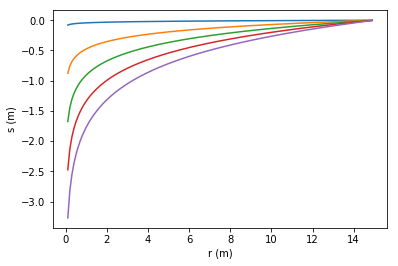

In [136]:
r=np.arange(0.1,15,0.1) # Distance [m]
Q =-np.arange(0.001,0.05,0.01)             # Pumping rate [m3/s]
T =0.01              # Aquifer transmissivity [m2/s]
R= 15                 # Sphere of influence [m]

for i in range(len(Q)):
    s=-Q[i]/(2*np.pi*T)*np.log(r/R)
    plt.plot(r,s)
    plt.xlabel('r (m)')
    plt.ylabel('s (m)')

Play around a bit with the parameter $T$ in the block above to evaluate the sensitivity of this hydrodynamic parameter to the drawdown curve. 

In unsteady state conditions we can use the Thies equations:

\begin{equation}
    s=\frac{Q}{4 \pi T} W(u(r,t))
\end{equation}

where $W(u(r,t))$ is the Theis formula, that can be evaluated as follows:

\begin{equation}
    u=\frac{r^2 S}{4 T t} 
\end{equation}

\begin{equation}
    Wu=\int_{u}^{\infty}\frac{e^{-u'}}{u'}du' 
\end{equation}

The latter equation can be approximated as follows:
\begin{equation}
    Wu=-\gamma - ln(u)+ \sum_{n=1}^{\infty} \frac{(-1)^{n-1}u^n}{n n!}
\end{equation}

with $\gamma=0.57721566$ the Euler constant. When $u<0.01$, we can use the following simplication:

\begin{equation}
    Wu=-\gamma - ln(u)=ln\left(\frac{e^{-\gamma}}{u}\right)=ln\left(\frac{2.25Tt}{r^2S}\right)
\end{equation}

which results in the Cooper-Jacob approximation:

\begin{equation}
    s=\frac{Q}{4 \pi T} ln\left(\frac{2.25Tt}{r^2S}\right)
\end{equation}

We first define our space time coordinates, our hydrogeological and design parameter $Q$. Note that negative pumping rates refer to water extractions:

In [128]:
r=np.arange(0.1,15,0.1) # Distance [m]
t=np.arange(1*3600,100*3600,3600) # Time [s]
T =0.01              # Aquifer transmissivity [m2/s]
S=0.0001            # Aquifer storage coefficient [-]
Q = -0.001             # Pumping rate [m3/s] (In this formulation, we keep the pumping rate negative)


We demonstrate how we can calculate the Theis function numerically

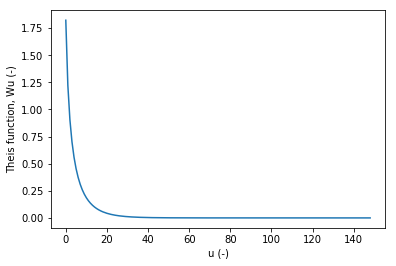

In [137]:
u=np.arange(0.1,15,0.1)
from scipy.integrate import quad
def integrand (u_acc):
    return np.exp(-u_acc)/u_acc
wu=len(u)*[0]
for i in range(len(u)):
    wu[i]=quad(integrand,u[i],np.inf)[0]
plt.plot(wu)
plt.xlabel('u (-)')
plt.ylabel('Theis function, Wu (-)')

We apply this function to calculate the transient solution of the drawdown

In [130]:
u=np.zeros(shape=(len(t),len(r)))
wu=np.zeros(shape=(len(t),len(r)))
s_fulltheis=np.zeros(shape=(len(t),len(r)))

from scipy.integrate import quad

def integrand (u_acc):
    return np.exp(-u_acc)/u_acc

for i in range(len(t)):
    for j in range(len(r)):
        u[i,j]=((r[j]**2)*S)/(4*T*t[i])
        wu[i,j]=np.asarray(quad(integrand,u[i,j],np.inf))[0]
        s_fulltheis[i,j]=Q/(4*np.pi*T)*wu[i,j]
      

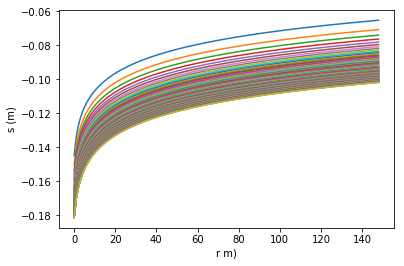

In [138]:
for i in range(len(t)):
    plt.plot(s_fulltheis[i,:])
    plt.xlabel('r m)')
    plt.ylabel('s (m)')

We compare this with approximate solution of Cooper Jacob:

In [132]:
s_cooper_jacob=np.zeros(shape=(len(t),len(r)))

for i in range(len(t)):
    for j in range(len(r)):
        s_cooper_jacob[i,j]=Q/(4*np.pi*T)*np.log((2.25*T*t[i])/(S*r[j]**2))


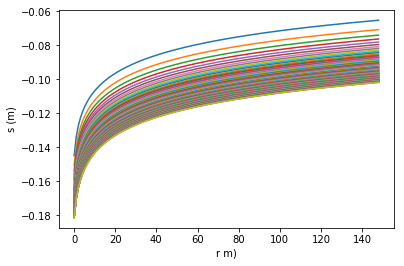

In [139]:
for i in range(len(t)):
    plt.plot(s_cooper_jacob[i,:])
    plt.xlabel('r m)')
    plt.ylabel('s (m)')

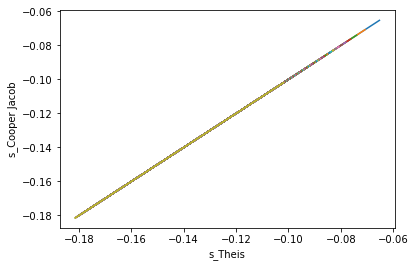

In [140]:
for i in range(len(t)):
    plt.plot(s_fulltheis[i,:],s_cooper_jacob[i,:])
    plt.xlabel('s_Theis')
    plt.ylabel('s_Cooper Jacob')

We see nearly no difference in the drawdown curve between both solutions for the considered system parameters.

Play around with the system parameters to evaluate the impact of them on the drawdown curves. 